In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import plotly.graph_objects as go

In [2]:
end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
start_date =(pd.Timestamp.now() - pd.DateOffset(years=30)).strftime('%Y-%m-%d')

In [3]:
AAPL = yf.download("AAPL",start=start_date,end=end_date) 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
BABA = yf.download("BABA",start=start_date,end=end_date) 

[*********************100%***********************]  1 of 1 completed


In [5]:
PDD = yf.download("PDD",start=start_date,end=end_date) 

[*********************100%***********************]  1 of 1 completed


Stock 

In [6]:
spx = yf.download('^GSPC',start='1990-01-01',end = '2025-04-13')

[*********************100%***********************]  1 of 1 completed


In [7]:
QQQ = yf.download('QQQ',start='1990-01-01',end = '2025-04-13')

[*********************100%***********************]  1 of 1 completed


In [8]:
EEM = yf.download('EEM',start='1990-01-01',end = '2025-04-13')

[*********************100%***********************]  1 of 1 completed


In [9]:
IWM = yf.download('IWM',start='1990-01-01',end = '2025-04-13')

[*********************100%***********************]  1 of 1 completed


products

In [10]:
USO = yf.download('USO',start='1990-01-01',end = '2025-04-13')

[*********************100%***********************]  1 of 1 completed


In [11]:
GLD = yf.download('GLD',start='1990-01-01',end = '2025-04-13')

[*********************100%***********************]  1 of 1 completed


In [12]:
SLV = yf.download('SLV',start='1990-01-01',end = '2025-04-13')


[*********************100%***********************]  1 of 1 completed


interests

In [13]:
TLT = yf.download('TLT',start='1990-01-01',end = '2025-04-13')


[*********************100%***********************]  1 of 1 completed


In [14]:
TBT = yf.download('TBT',start='1990-01-01',end = '2025-04-13')

[*********************100%***********************]  1 of 1 completed


In [15]:
IEF = yf.download('IEF',start='1990-01-01',end = '2025-04-13')


[*********************100%***********************]  1 of 1 completed


credeit

In [16]:
HYG = yf.download('HYG',start='1990-01-01',end = '2025-04-13')
EMB = yf.download('EMB',start='1990-01-01',end = '2025-04-13')
LQD = yf.download('LQD',start='1990-01-01',end = '2025-04-13')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


flutuation

In [17]:
UVXY = yf.download('UVXY',start='1990-01-01',end = '2025-04-13')

[*********************100%***********************]  1 of 1 completed


In [18]:
SVXY = yf.download('SVXY',start='1990-01-01',end = '2025-04-13')

[*********************100%***********************]  1 of 1 completed


Back up all datas

In [19]:
def plot_stock_price(data, ticker, price_col='Close', use_log=True, 
                    figsize=(12,6), color='blue', linewidth=1.5,
                    title_fontsize=14, label_fontsize=12, grid_alpha=0.7):
    """
    Plot stock prices in either log2 scale or linear scale.
    
    Parameters:
    data (DataFrame): DataFrame containing stock data with datetime index
    ticker (str): Stock ticker symbol to display in title
    price_col (str): Name of column containing price data (default 'Close')
    use_log (bool): Whether to use log2 scale (default True)
    figsize (tuple): Figure dimensions (default (12,6))
    color (str): Plot color (default 'blue')
    linewidth (float): Line width (default 1.5)
    title_fontsize (int): Title font size (default 14)
    label_fontsize (int): Axis label font size (default 12)
    grid_alpha (float): Grid transparency (default 0.7)
    """
    # Calculate y-axis values and labels
    if use_log:
        y_values = np.log2(data[price_col])
        y_label = 'Log₂ Close Price'
        scale_note = 'Log₂'
    else:
        y_values = data[price_col]
        y_label = 'Close Price'
        scale_note = ''
    
    # Extract date range from index
    start_date = data.index.min().strftime('%Y')
    end_date = data.index.max().strftime('%Y')
    
    # Create plot
    plt.figure(figsize=figsize)
    plt.plot(data.index, y_values, color=color, linewidth=linewidth)
    plt.title(f'{ticker} {scale_note} Closing Price ({start_date}-{end_date})', 
             fontsize=title_fontsize)
    plt.xlabel('Date', fontsize=label_fontsize)
    plt.ylabel(y_label, fontsize=label_fontsize)
    plt.grid(True, linestyle='--', alpha=grid_alpha)
    plt.show()

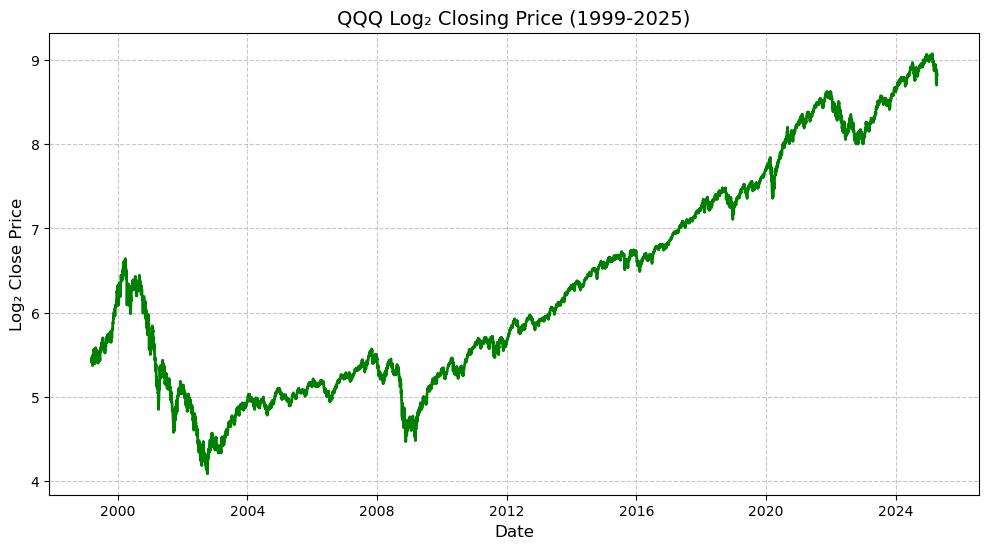

In [20]:
plot_stock_price(QQQ, 'QQQ', use_log=True, color='green', linewidth=2)

In [21]:
def plotly_stock_price(data, ticker, price_col='Close', use_log=True,
                      line_color='#1f77b4', line_width=2, mode='lines',
                      template='plotly_white', hovermode='x unified',
                      figsize=(900, 500), show=True):
    """
    Create interactive stock price plot using Plotly with log/linear scale option.
    
    Parameters:
    data (pd.DataFrame): DataFrame with datetime index and price data
    ticker (str): Stock ticker symbol for title display
    price_col (str): Name of price column (default 'Close')
    use_log (bool): Use log2 scale (default True)
    line_color (str): Line color (default Plotly blue)
    line_width (int): Line width (default 2)
    mode (str): Plot mode (default 'lines')
    template (str): Plotly template (default 'plotly_white')
    hovermode (str): Hover behavior (default 'x unified')
    figsize (tuple): Figure dimensions (width, height) in pixels
    show (bool): Immediately show plot (default True)
    
    Returns:
    go.Figure: Plotly figure object for further customization
    """

    # pattern = re.compile((r'^Log'),flags= re.IGNORECASE)
    # cols_to_drop = [col for col in data.columns if pattern.match(str(col))]
    # if cols_to_drop:
    #     data = data.drop(columns=cols_to_drop,inplace=True,errors='ignore')
    #     print("after drop :",data.shape)
    
    # Calculate y-axis values
    if use_log:   
        data['Log2_Close'] = np.log2(data[price_col])
        y_values = data['Log2_Close']
        print("use log :",data.shape)
    

    else:
        y_values = data[price_col]

    # Generate dynamic labels
    scale_label = 'Log₂' if use_log else ''
    start_date = data.index.min().strftime('%Y')
    end_date = data.index.max().strftime('%Y')
    
    # Create figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=data.index,
        y=y_values,
        mode=mode,
        line=dict(color=line_color, width=line_width),
        name=f'{scale_label} Price' if scale_label else 'Price'
    ))
    
    # Update layout
    fig.update_layout(
        title=f'{ticker} {scale_label} Closing Price ({start_date}-{end_date})',
        xaxis_title='Date',
        yaxis_title=f'{scale_label}(Close Price)' if scale_label else 'Close Price',
        template=template,
        hovermode=hovermode,
        width=figsize[0],
        height=figsize[1]
    )
    
    if show:
        fig.show()
    return fig

In [22]:
plotly_stock_price(QQQ, 'QQQ', use_log=True, 
                 line_color='#1f77b4', line_width=3,
                 template='plotly_white')

use log : (6565, 6)


In [23]:
EEM_backup=EEM
plotly_stock_price(EEM, 'EEM', use_log=True, 
                 line_color='#1f77b4', line_width=3,
                 template='plotly_white')

use log : (5536, 6)
